<a href="https://colab.research.google.com/github/NathalyDM/genetifics/blob/main/ImageProcessingTutorials/Tutorial_de_Clasificaci%C3%B3n_de_Im%C3%A1genes_de_Animales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Tutorial de Clasificación de Imágenes de Animales**

**Paso 1: Instalar las Bibliotecas Necesarias**
Primero, necesitamos instalar las bibliotecas necesarias. Puedes hacerlo ejecutando los siguientes comandos en tu terminal o en un entorno Jupyter Noteb

In [ ]:
!pip install tensorflow
!pip install matplotlib

**Paso 2: Importar las Bibliotecas**
Vamos a importar las bibliotecas necesarias para trabajar con los datos y construir nuestro modelo.

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
from sklearn.metrics import f1_score, precision_score, accuracy_score
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt


**Paso 3: Cargar y Preprocesar los Datos**

Cargamos la base de datos CIFAR-10 y preprocesamos los datos.

Explicación: Aquí cargamos el conjunto de datos CIFAR-10 que contiene imágenes de 10 clases diferentes. Luego, normalizamos las imágenes para que sus valores estén entre 0 y 1, lo cual ayuda a mejorar el rendimiento del modelo. Finalmente, visualizamos algunas imágenes con sus etiquetas correspondientes.

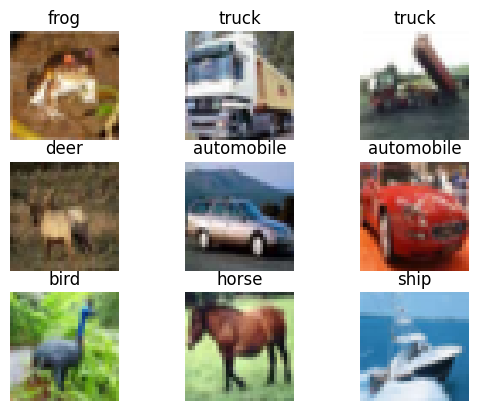

In [5]:
# Cargar los datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar las imágenes a valores entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definir los nombres de las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizar algunas imágenes
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

**Paso 4: Definir el Modelo**
Definimos un modelo de red neuronal convolucional (CNN) para clasificar las imágenes.

Explicación: Aquí definimos un modelo CNN. Las capas convolucionales (Conv2D) son útiles para detectar características en las imágenes, como bordes y texturas. Las capas de pooling (MaxPooling2D) reducen la dimensión de las características, manteniendo las más importantes. La capa Flatten convierte las características 2D en un vector 1D, y las capas Dense son capas totalmente conectadas que realizan la clasificación final.

In [34]:
# Crear el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

**Paso 5: Compilar el Modelo**
Compilamos el modelo especificando la función de pérdida, el optimizador y las métricas.

Explicación: Compilamos el modelo con el optimizador Adam, que ajusta los pesos del modelo para minimizar la pérdida. Usamos la función de pérdida sparse_categorical_crossentropy porque estamos clasificando más de dos clases y las etiquetas no están en formato one-hot.

In [35]:
# Paso 5: Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Paso 6: Entrenar el Modelo**
Entrenamos el modelo utilizando los datos de entrenamiento.

Explicación: Entrenamos el modelo durante 10 épocas, lo que significa que el modelo verá el conjunto de datos completo 10 veces. También utilizamos los datos de prueba como datos de validación para monitorear el rendimiento del modelo en datos no vistos durante el entrenamiento.

In [ ]:
# Definir el callback personalizado
class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.f1s = []
        self.precisions = []
        self.accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.validation_data[0])
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = self.validation_data[1].flatten()

        f1 = f1_score(y_true, y_pred_classes, average='weighted')
        precision = precision_score(y_true, y_pred_classes, average='weighted')
        accuracy = accuracy_score(y_true, y_pred_classes)

        self.f1s.append(f1)
        self.precisions.append(precision)
        self.accuracies.append(accuracy)

        print(f'Epoch {epoch+1}: F1 Score: {f1}, Precision: {precision}, Accuracy: {accuracy}')

# Instanciar el callback con los datos de validación
metrics_callback = MetricsCallback(validation_data=(x_test, y_test))

# Paso 6: Entrenar el modelo con el callback
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[metrics_callback])


Epoch 1/20
313/313 [==============================] - 4s 13ms/step
Epoch 1: F1 Score: 0.5043910484233168, Precision: 0.546441550559366, Accuracy: 0.5082
1563/1563 [==============================] - 88s 54ms/step - loss: 1.6496 - accuracy: 0.3900 - val_loss: 1.3264 - val_accuracy: 0.5082
Epoch 2/20
313/313 [==============================] - 4s 13ms/step
Epoch 2: F1 Score: 0.6038315898917987, Precision: 0.61689471272468, Accuracy: 0.6024
1563/1563 [==============================] - 81s 52ms/step - loss: 1.2811 - accuracy: 0.5426 - val_loss: 1.1119 - val_accuracy: 0.6024
Epoch 3/20
313/313 [==============================] - 5s 16ms/step
Epoch 3: F1 Score: 0.6384255892826567, Precision: 0.6543454984049214, Accuracy: 0.6385
1563/1563 [==============================] - 82s 52ms/step - loss: 1.1194 - accuracy: 0.6075 - val_loss: 1.0175 - val_accuracy: 0.6385
Epoch 4/20
313/313 [==============================] - 6s 18ms/step
Epoch 4: F1 Score: 0.6732160186984087, Precision: 0.6774583586297471,

**Paso 7: Evaluar el Modelo**
Evaluamos el modelo utilizando los datos de prueba.

Explicación: Evaluamos el modelo para ver qué tan bien se desempeña en datos no vistos. Esto nos da una idea de la precisión del modelo en el mundo real.

In [47]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

313/313 [==============================] - 9s 29ms/step - loss: 0.8975 - accuracy: 0.7239

Test accuracy: 0.7239000201225281


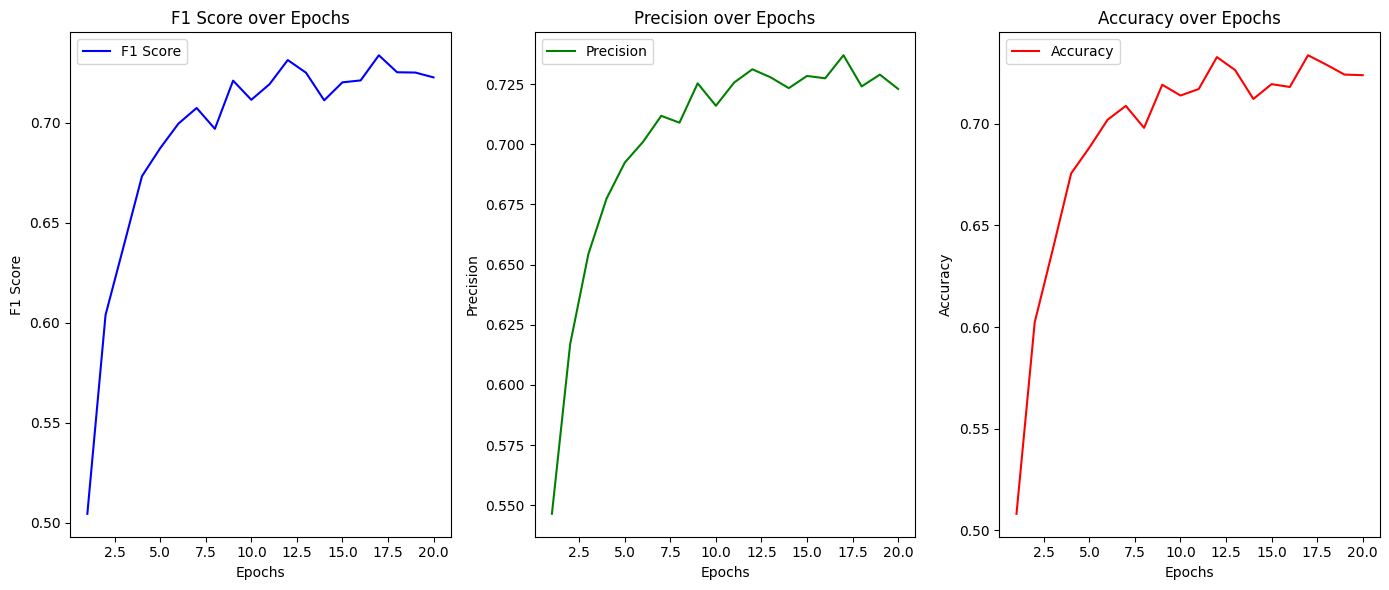

In [48]:
# Graficar F1 Score, Precision y Accuracy a lo largo de las épocas
epochs = range(1, 21)  # Asumimos 20 épocas de entrenamiento
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(epochs, metrics_callback.f1s, 'b-', label='F1 Score')
plt.title('F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, metrics_callback.precisions, 'g-', label='Precision')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, metrics_callback.accuracies, 'r-', label='Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Paso 8: Hacer Predicciones**
Utilizamos el modelo entrenado para hacer predicciones sobre nuevas imágenes.

Explicación: Usamos el modelo para predecir las etiquetas de las imágenes de prueba. Luego, mostramos una imagen de prueba y su etiqueta predicha.

313/313 [==============================] - 8s 27ms/step


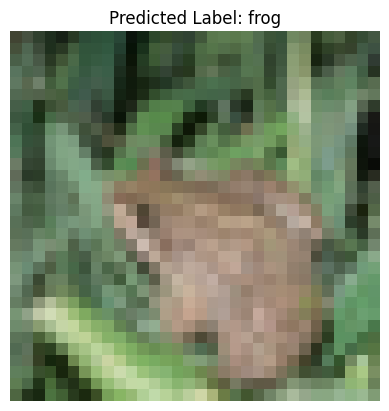

In [51]:
# Hacer predicciones
predictions = model.predict(x_test)

# Mostrar la primera imagen de prueba y la predicción
plt.imshow(x_test[4])
plt.title(f'Predicted Label: {class_names[predictions[4].argmax()]}')
plt.axis('off')
plt.show()


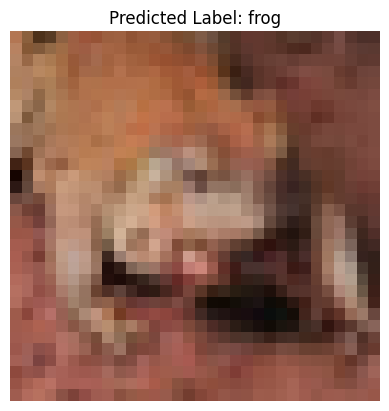

In [52]:
# Mostrar la primera imagen de prueba y la predicción
plt.imshow(x_test[5])
plt.title(f'Predicted Label: {class_names[predictions[5].argmax()]}')
plt.axis('off')
plt.show()

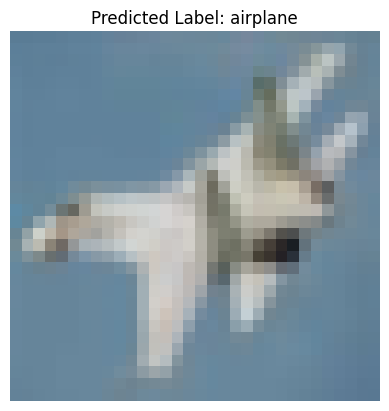

In [53]:
# Mostrar la primera imagen de prueba y la predicción
plt.imshow(x_test[10])
plt.title(f'Predicted Label: {class_names[predictions[10].argmax()]}')
plt.axis('off')
plt.show()